# Hypertension Prediction Model

##### Imports

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# save model
import pickle

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load and split data

In [2]:
ht_df = pd.read_csv('../data/ml_data/hypertension_data.csv')

print(ht_df.shape)
ht_df.head()

(26083, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
ht_df["target"].value_counts()

target
1    14274
0    11809
Name: count, dtype: int64

In [4]:
features = ['age', 'cp', 'trestbps', 'chol', 'thal']

In [5]:
X = ht_df.loc[:, features]
y = ht_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((20866, 5), (5217, 5))

### Classification Function

In [6]:
# Function for Classification
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

## Logistic Regression

TRAIN METRICS
    Confusion Matrix: 
    [[6412 3060]
 [2262 9132]]
    
    AUC: 0.8131403628524851

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.68      0.71      9472
           1       0.75      0.80      0.77     11394

    accuracy                           0.74     20866
   macro avg       0.74      0.74      0.74     20866
weighted avg       0.74      0.74      0.74     20866

    
TEST METRICS
    Confusion Matrix: 
    [[1585  752]
 [ 622 2258]]
    
    AUC: 0.8082736057623734

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.70      2337
           1       0.75      0.78      0.77      2880

    accuracy                           0.74      5217
   macro avg       0.73      0.73      0.73      5217
weighted avg       0.74      0.74      0.74      5217

    


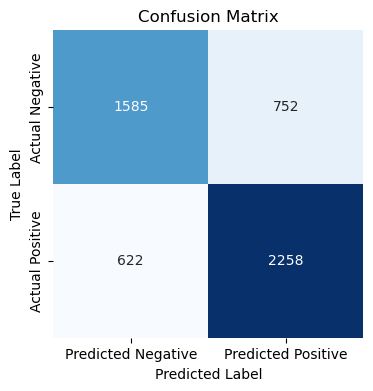

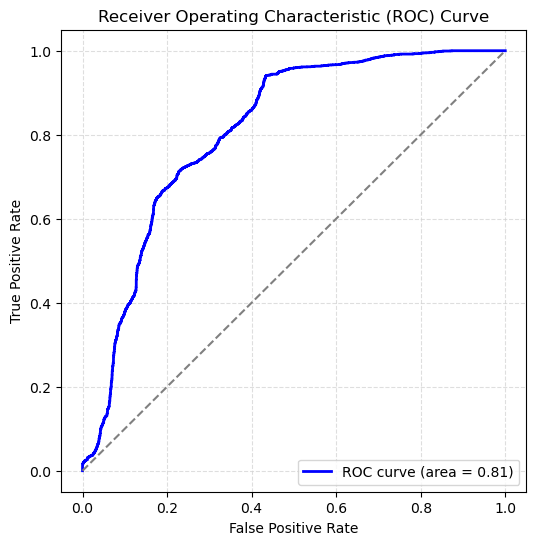

In [7]:
lr = LogisticRegression(random_state=42)
doClassification(lr, X_train, X_test, y_train, y_test)

Logistic Regression is not the best model.

## Decision Tree

TRAIN METRICS
    Confusion Matrix: 
    [[ 9465     7]
 [   44 11350]]
    
    AUC: 0.9999866804378431

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      9472
           1       1.00      1.00      1.00     11394

    accuracy                           1.00     20866
   macro avg       1.00      1.00      1.00     20866
weighted avg       1.00      1.00      1.00     20866

    
TEST METRICS
    Confusion Matrix: 
    [[2329    8]
 [  17 2863]]
    
    AUC: 0.9983364682879284

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99      2337
           1       1.00      0.99      1.00      2880

    accuracy                           1.00      5217
   macro avg       0.99      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217

    


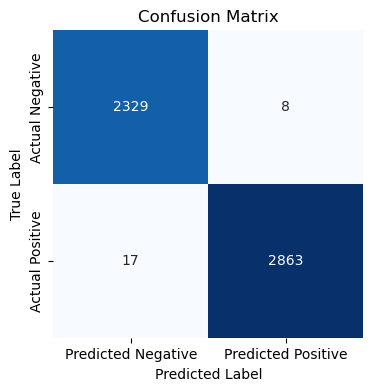

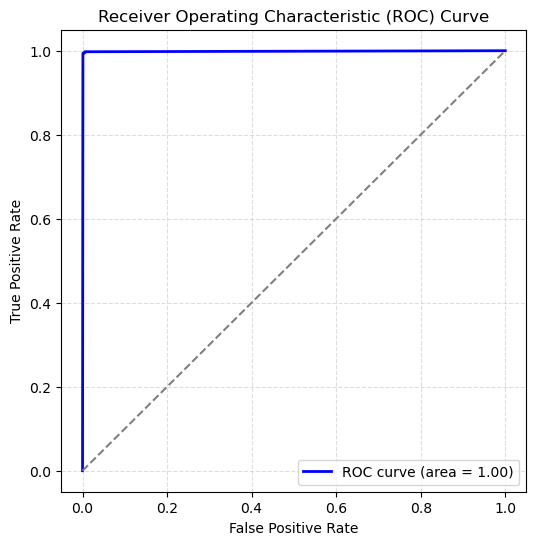

In [8]:
dt = DecisionTreeClassifier(random_state=42)
doClassification(dt, X_train, X_test, y_train, y_test)

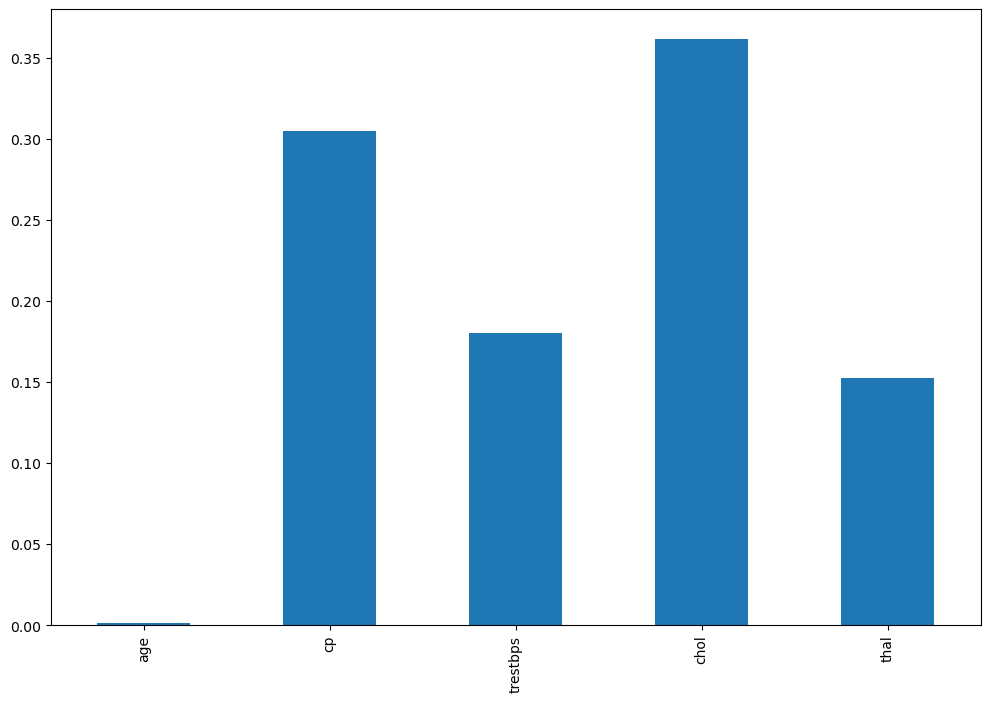

In [9]:
importances = pd.Series(dt.feature_importances_, index=features)
importances.plot(kind='bar', figsize=(12, 8))
plt.show()

Definitely over-fit.

## AdaBoost

TRAIN METRICS
    Confusion Matrix: 
    [[ 7668  1804]
 [ 1367 10027]]
    
    AUC: 0.9203295369940439

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.81      0.83      9472
           1       0.85      0.88      0.86     11394

    accuracy                           0.85     20866
   macro avg       0.85      0.84      0.85     20866
weighted avg       0.85      0.85      0.85     20866

    
TEST METRICS
    Confusion Matrix: 
    [[1884  453]
 [ 329 2551]]
    
    AUC: 0.9185484565920221

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.81      0.83      2337
           1       0.85      0.89      0.87      2880

    accuracy                           0.85      5217
   macro avg       0.85      0.85      0.85      5217
weighted avg       0.85      0.85      0.85      5217

    


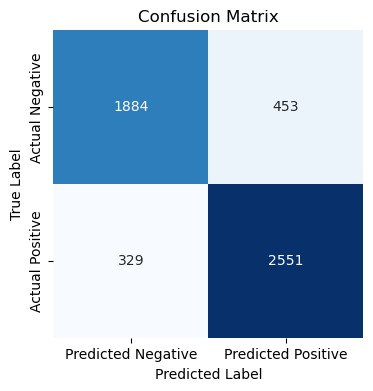

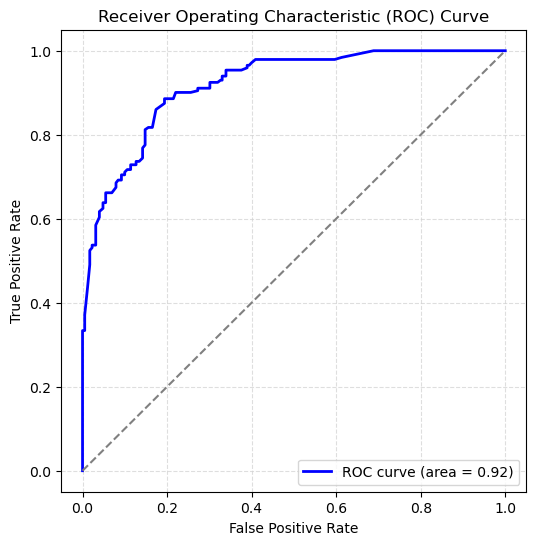

In [10]:
ada = AdaBoostClassifier(random_state=42)
doClassification(ada, X_train, X_test, y_train, y_test)

Seems good, but 208 false negatives.

## Random Forest

TRAIN METRICS
    Confusion Matrix: 
    [[ 9454    18]
 [   33 11361]]
    
    AUC: 0.9999866619062783

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      9472
           1       1.00      1.00      1.00     11394

    accuracy                           1.00     20866
   macro avg       1.00      1.00      1.00     20866
weighted avg       1.00      1.00      1.00     20866

    
TEST METRICS
    Confusion Matrix: 
    [[2328    9]
 [  17 2863]]
    
    AUC: 0.9998582584510054

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99      2337
           1       1.00      0.99      1.00      2880

    accuracy                           1.00      5217
   macro avg       0.99      1.00      0.99      5217
weighted avg       1.00      1.00      1.00      5217

    


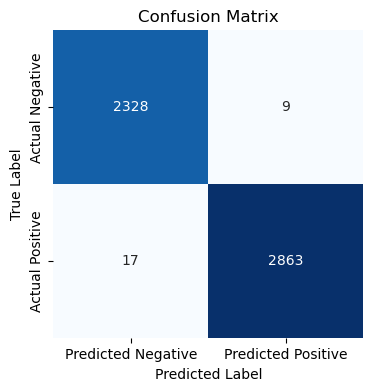

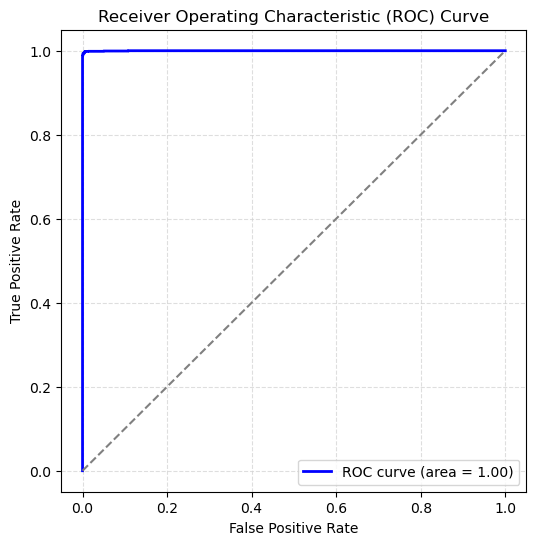

In [11]:
rf = RandomForestClassifier(random_state=42)
doClassification(rf, X_train, X_test, y_train, y_test)

Over-fit.

## LightGBM

[LightGBM] [Info] Number of positive: 11394, number of negative: 9472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 20866, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546056 -> initscore=0.184747
[LightGBM] [Info] Start training from score 0.184747
TRAIN METRICS
    Confusion Matrix: 
    [[ 9472     0]
 [   63 11331]]
    
    AUC: 0.9999787628268079

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00      9472
           1       1.00      0.99      1.00     11394

    accuracy                           1.00     20866
   macro avg       1.00      1.00      1.00     20866
weighted avg       1.00      1.00     

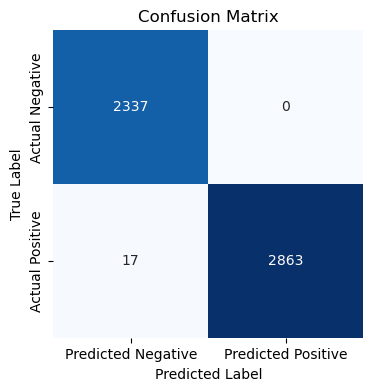

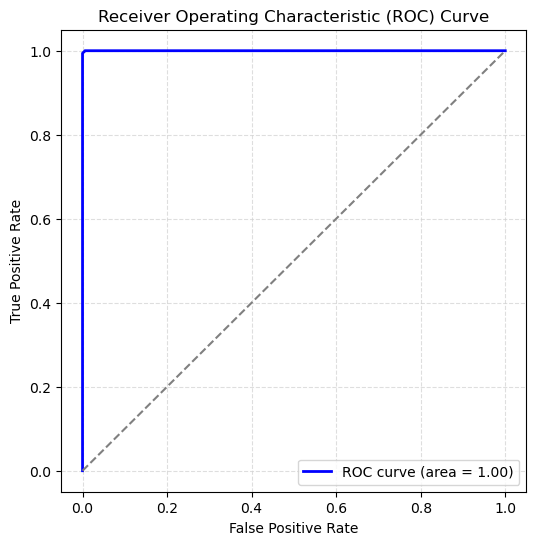

In [12]:
lgbm = LGBMClassifier(random_state=42)
doClassification(lgbm, X_train, X_test, y_train, y_test)

Over-fit.

## XGBoost

TRAIN METRICS
    Confusion Matrix: 
    [[ 9458    14]
 [   42 11352]]
    
    AUC: 0.9999841045503443

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      9472
           1       1.00      1.00      1.00     11394

    accuracy                           1.00     20866
   macro avg       1.00      1.00      1.00     20866
weighted avg       1.00      1.00      1.00     20866

    
TEST METRICS
    Confusion Matrix: 
    [[2330    7]
 [  17 2863]]
    
    AUC: 0.999970656230685

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99      2337
           1       1.00      0.99      1.00      2880

    accuracy                           1.00      5217
   macro avg       1.00      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217

    


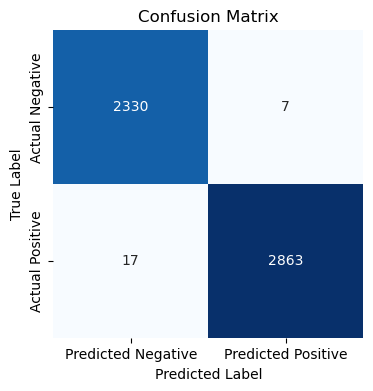

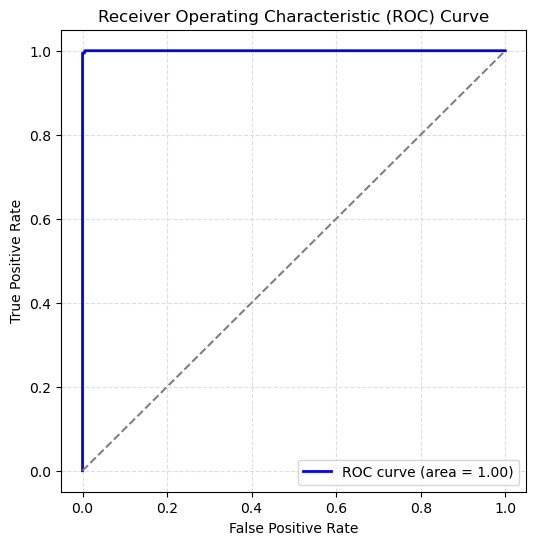

In [13]:
xgb = XGBClassifier(random_state=42)
doClassification(xgb, X_train, X_test, y_train, y_test)

Over-fit.

## Extra Trees

TRAIN METRICS
    Confusion Matrix: 
    [[ 9465     7]
 [   44 11350]]
    
    AUC: 0.9999866804378431

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      9472
           1       1.00      1.00      1.00     11394

    accuracy                           1.00     20866
   macro avg       1.00      1.00      1.00     20866
weighted avg       1.00      1.00      1.00     20866

    
TEST METRICS
    Confusion Matrix: 
    [[2329    8]
 [  17 2863]]
    
    AUC: 0.9980703685874577

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99      2337
           1       1.00      0.99      1.00      2880

    accuracy                           1.00      5217
   macro avg       0.99      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217

    


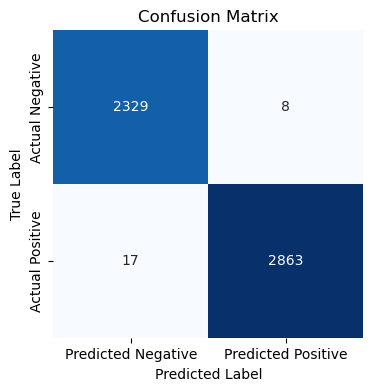

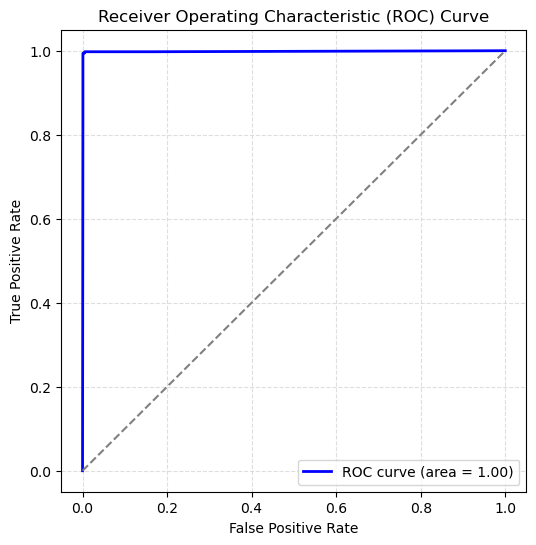

In [14]:
et = ExtraTreesClassifier(random_state=42)
doClassification(et, X_train, X_test, y_train, y_test)

Over-fit.

## Gradient Boost

TRAIN METRICS
    Confusion Matrix: 
    [[ 8350  1122]
 [  329 11065]]
    
    AUC: 0.9798216138606023

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.88      0.92      9472
           1       0.91      0.97      0.94     11394

    accuracy                           0.93     20866
   macro avg       0.94      0.93      0.93     20866
weighted avg       0.93      0.93      0.93     20866

    
TEST METRICS
    Confusion Matrix: 
    [[2056  281]
 [  93 2787]]
    
    AUC: 0.9805498353777397

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.88      0.92      2337
           1       0.91      0.97      0.94      2880

    accuracy                           0.93      5217
   macro avg       0.93      0.92      0.93      5217
weighted avg       0.93      0.93      0.93      5217

    


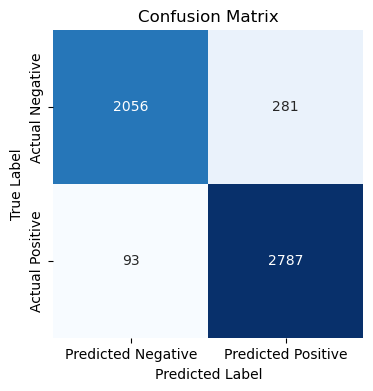

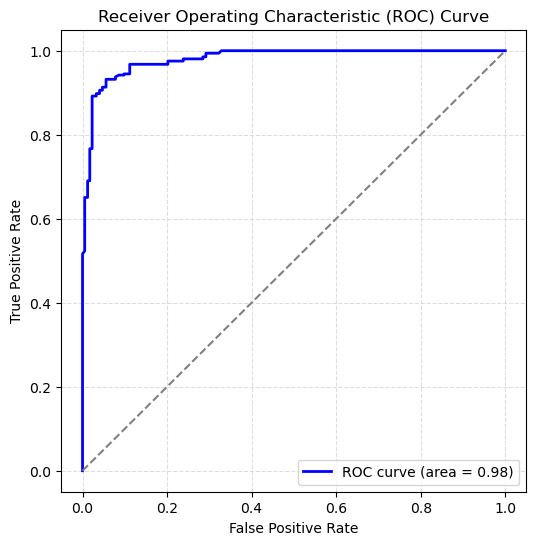

In [15]:
gb = GradientBoostingClassifier(random_state=42)
doClassification(gb, X_train, X_test, y_train, y_test)

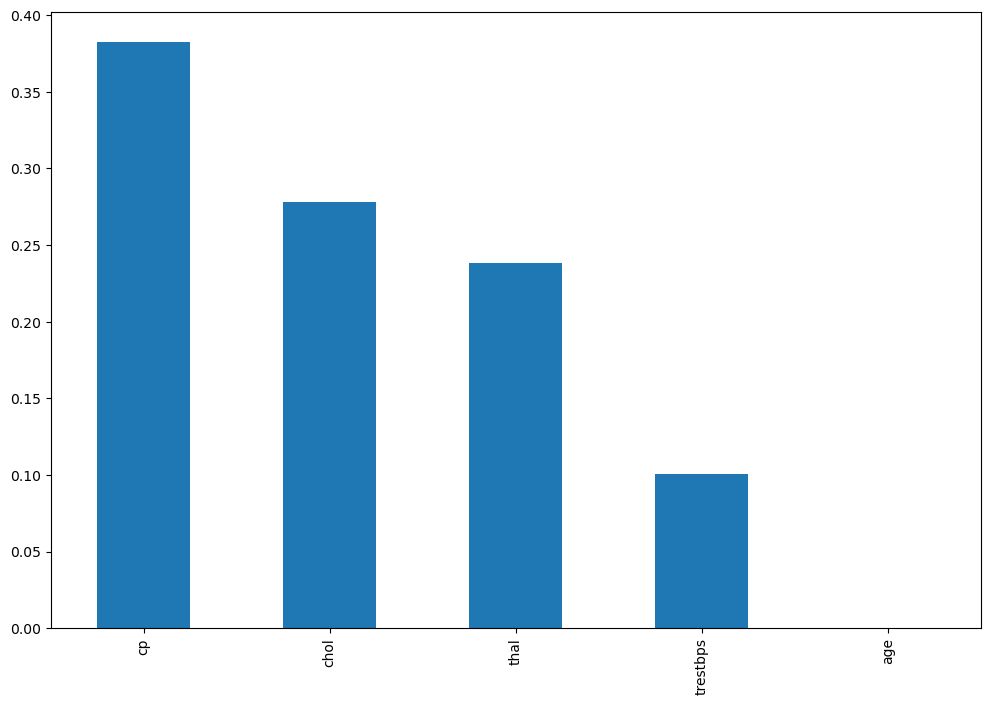

In [16]:
importances = pd.Series(gb.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12, 8))
plt.show()

Great! Seems to be accurate without any false negatives.

## Save Model

In [17]:
pickle.dump(gb, open('models/hypertension_model.h5', 'wb'))